In [12]:
import pandas as pd
import numpy as np

In [13]:
file_path = 'D:\\aicp\\tasks\\userbehaviour.csv'
df = pd.read_csv(file_path)

In [14]:
# Check for null values
null_values = df.isnull().sum()

# Display column information
column_info = df.info()

# Show descriptive statistics
descriptive_stats = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [15]:
# Calculate the highest, lowest, and average screen time
highest_screen_time = df["Average Screen Time"].max()
lowest_screen_time = df["Average Screen Time"].min()
average_screen_time = df["Average Screen Time"].mean()


In [16]:
# Print the results
print(f"Highest Screen Time: {highest_screen_time} minutes")
print(f"Lowest Screen Time: {lowest_screen_time} minutes")
print(f"Average Screen Time: {average_screen_time} minutes")

Highest Screen Time: 50.0 minutes
Lowest Screen Time: 0.0 minutes
Average Screen Time: 24.39039039039039 minutes


In [17]:
# Calculate the highest, lowest, and average amount spent on the app (INR)
highest_spent = df["Average Spent on App (INR)"].max()
lowest_spent = df["Average Spent on App (INR)"].min()
average_spent = df["Average Spent on App (INR)"].mean()

In [18]:
# Print the results
print(f"Highest Amount Spent: {highest_spent} INR")
print(f"Lowest Amount Spent: {lowest_spent} INR")
print(f"Average Amount Spent: {average_spent} INR")

Highest Amount Spent: 998.0 INR
Lowest Amount Spent: 0.0 INR
Average Amount Spent: 424.4154154154154 INR


In [29]:
# Filter active and uninstalled users
active_users = df[df["Status"] == "Installed"]
uninstalled_users = df[df["Status"] == "Uninstalled"]

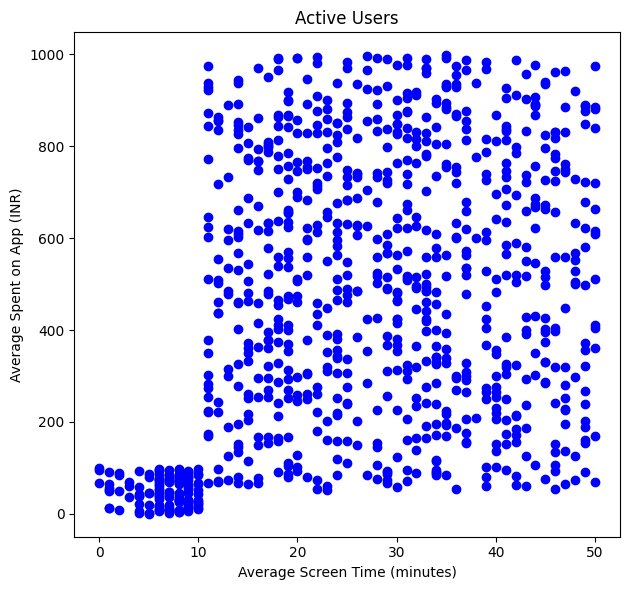

In [30]:
# Scatter plot for active users
import matplotlib.pyplot as plt

# Scatter plot for active users
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(active_users["Average Screen Time"], active_users["Average Spent on App (INR)"], color='blue')
plt.title('Active Users')
plt.xlabel('Average Screen Time (minutes)')
plt.ylabel('Average Spent on App (INR)')

plt.tight_layout()
plt.show()

## Observation
* average screen times (0 to 50 minutes) and average amounts spent (0 to 1000 INR).
* There is a cluster of users who spend less than 10 minutes on the app and tend to spend less than 200 INR.
* Some users with lower screen times (around 10 minutes) can still spend significant amounts on the app (up to 1000 INR).
* Users with higher screen times are more spread out in terms of their spending.
* It is more dispersed suggesting that time spent on the app does not directly correlate with spending.

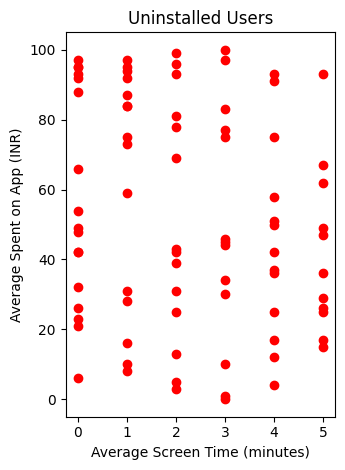

In [31]:
# Scatter plot for uninstalled users
plt.subplot(1, 2, 2)
plt.scatter(uninstalled_users["Average Screen Time"], uninstalled_users["Average Spent on App (INR)"], color='red')
plt.title('Uninstalled Users')
plt.xlabel('Average Screen Time (minutes)')
plt.ylabel('Average Spent on App (INR)')

plt.tight_layout()
plt.show()

## Observation
* The screen time for uninstalled users is very narrow, ranging only from 0 to 5 minutes.This indicates that users who uninstalled the app did not spend much time using it before deciding to uninstall.
* There are users who spent very little time on the app (close to 0 minutes) but still spent varying amounts, some even up to 100 INR.
* There are clusters of spending amounts across  screen time. For example, at 1-minute screen time, spending amounts are distributed from 0 to 100 INR.Similar patterns are observed for other screen time values (2, 3, 4, and 5 minutes).


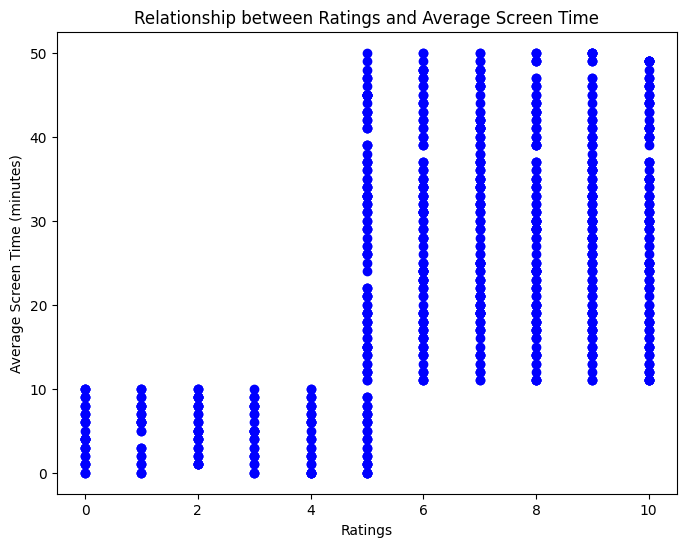

In [33]:
# Scatter plot to check the relationship between ratings and average screen time
plt.figure(figsize=(8, 6))
plt.scatter(df["Ratings"], df["Average Screen Time"], color='blue')
plt.title('Relationship between Ratings and Average Screen Time')
plt.xlabel('Ratings')
plt.ylabel('Average Screen Time (minutes)')
plt.show()

## Observation
* There is a noticeable increase in screen time as ratings increase from 5 to 10. Users who rate the app higher tend to spend more time on the app.
* Users with ratings between 6 and 10 have screen times ranging from approximately 20 to 50 minutes.
* Users who have given lower ratings (0 to 4) tend to have significantly lower screen times, typically under 10 minutes.This suggests that users who are less satisfied with the app spend less time on it.
* There are **distinct** clusters for each rating value. For example, users with a rating of 6 have a screen time distribution ranging from 20 to 50 minutes, while users with a rating of 4 have screen times clustered around 0 to 10 minutes.

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [35]:
# Selecting relevant features for clustering
features = df[['Average Screen Time', 'Average Spent on App (INR)']].dropna()


In [36]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [37]:
# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

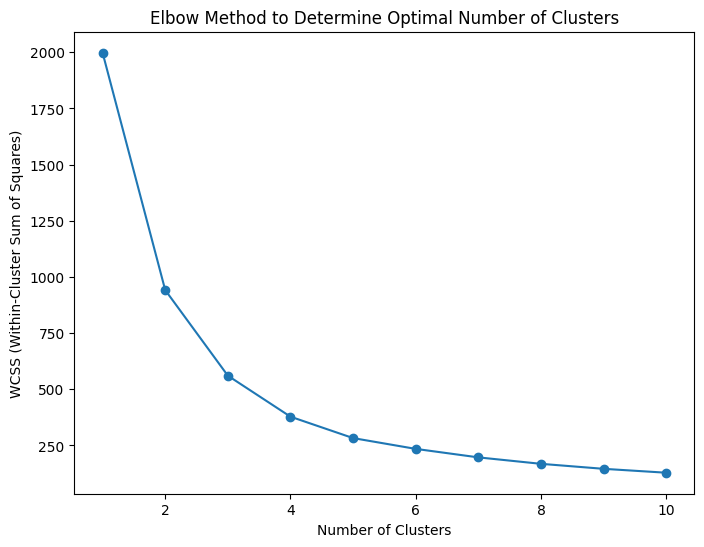

In [38]:
# Plotting the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11, 1), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [39]:
# Applying K-means with the optimal number of clusters
optimal_clusters = 3  # Based on the Elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

In [43]:
# Print the number of users in each segment
print(df['Cluster'].value_counts())

1    389
2    333
0    277
Name: Cluster, dtype: int64


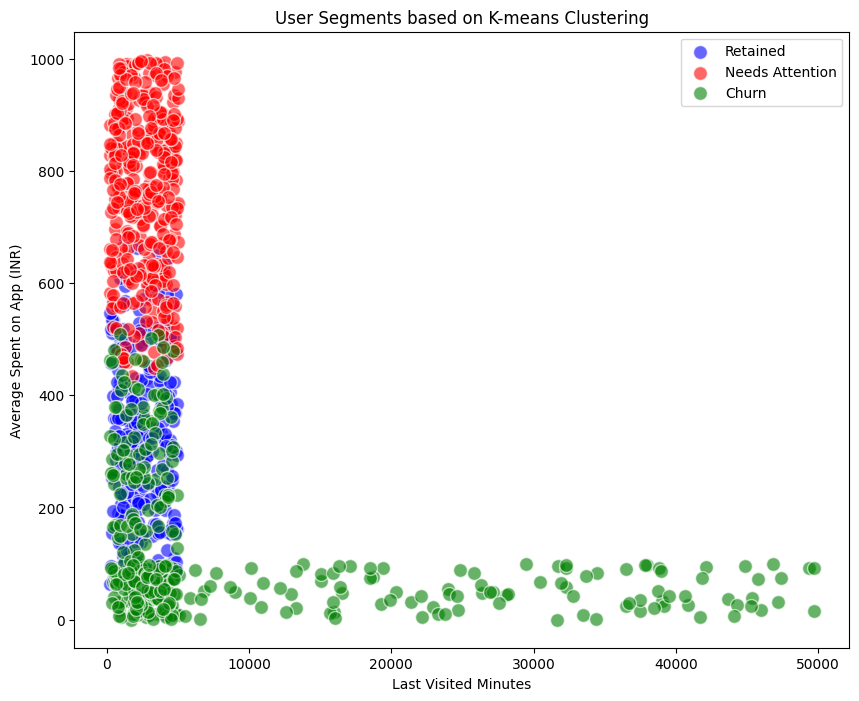

In [44]:
# Visualizing the clusters
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
labels = ['Retained', 'Needs Attention', 'Churn']

for i in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == i]['Last Visited Minutes'], 
                df[df['Cluster'] == i]['Average Spent on App (INR)'], 
                c=colors[i], label=labels[i], alpha=0.6, edgecolors='w', s=100)

plt.title('User Segments based on K-means Clustering')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.legend()
plt.show()

## Summary
Loaded the dataset and examined the columns to understand the available data.check null values, column info, and descriptive statistics of the data. Check the highest, lowest, and average screen time of all the users.Check the highest, lowest, and the average amount spent by all the usersCalculated basic statistics such as the highest, lowest, and average screen time and spending on the app to get an initial understanding of user behavior.Created scatter plots to explore the relationship between different variables, such as:
* Screen time and spending capacity.
* Ratings given by users and their average screen time.\
These visualizations helped to understand the underlying patterns and correlations in the data.
#### K-means Clustering:
Selected relevant features for clustering: Last Visited Minutes and Average Spent on App (INR).Standardized the features to ensure equal treatment in the clustering process.Applied the Elbow method to identify the optimal number of clusters, which was determined to be 3 based on the plot.mplemented K-means clustering with 3 clusters.Assigned cluster labels to each user in the dataset.Printed the number of users in each segment to understand the distribution.Visualized the clusters using a scatter plot with different colors representing different segments.


In [45]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()


C:\Users\92310\AppData\Local\Temp\ipykernel_10084\1993670743.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


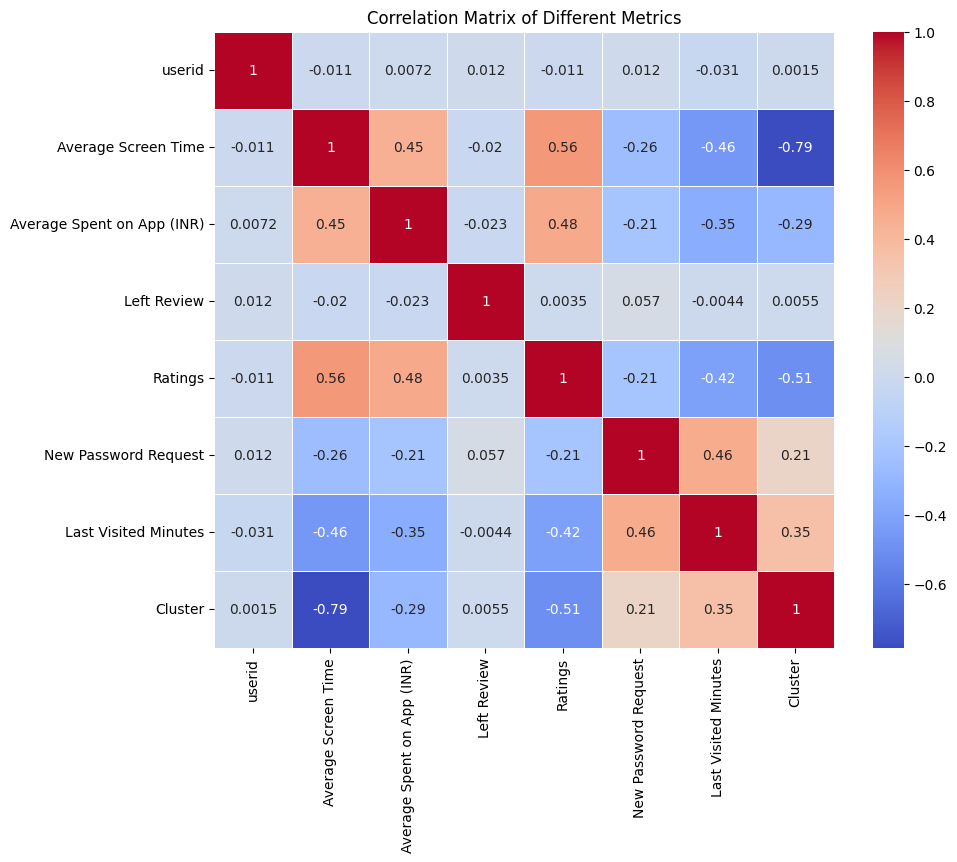

In [46]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Different Metrics')
plt.show()

## Observation
* There is a positive correlation (0.56) between 'Average Screen Time' and 'Ratings'. This indicates that users who spend more time on the app tend to give higher ratings.
* There is a moderate positive correlation (0.45) between 'Average Screen Time' and 'Average Spent on App (INR)'. This suggests that users who spend more time on the app are likely to spend more money on it.
* There is a positive correlation (0.48) between 'Ratings' and 'Average Spent on App (INR)', indicating that users who spend more money on the app tend to give higher ratings.
* There is a strong negative correlation (-0.79) between 'Cluster' and 'Average Screen Time'. This suggests that the clusters are significantly influenced by the screen time, with higher screen times being associated with a specific cluster.
* There is a negative correlation (-0.51) between 'Cluster' and 'Ratings', indicating that the clusters are also influenced by user ratings, with higher ratings associated with a specific cluster.
* There is a negative correlation (-0.46) between 'Last Visited Minutes' and 'Average Screen Time'. This indicates that users who visited the app a long time ago tend to have lower average screen times.
* There is a positive correlation (0.46) between 'Last Visited Minutes' and 'New Password Request'. This suggests that users who visited the app a long time ago are more likely to request a new password, possibly due to forgetting their credentials.

In [47]:
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection
features = df[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']].dropna()

# Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(features)


C:\Users\92310\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [48]:
# Predict anomalies
df['Anomaly'] = iso_forest.predict(features)

# -1 indicates an anomaly, 1 indicates normal
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

# Display the number of anomalies detected
print(df['Anomaly'].value_counts())

0    899
1    100
Name: Anomaly, dtype: int64


In [49]:
# Filter anomalies
anomalies = df[df['Anomaly'] == 1]

# Display the anomalies in the desired format
anomalies_display = anomalies[['userid', 'Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']]
print(anomalies_display)

     userid  Average Screen Time  Average Spent on App (INR)  Ratings  \
1      1002                  0.0                        54.0        4   
6      1007                 49.0                       887.0        9   
27     1028                 49.0                       848.0        5   
38     1039                  1.0                        97.0        1   
43     1044                  4.0                        93.0        2   
..      ...                  ...                         ...      ...   
943    1944                  4.0                        42.0        4   
947    1948                  2.0                         3.0        3   
949    1950                  0.0                        95.0        1   
978    1979                  1.0                        73.0        3   
979    1980                  2.0                        43.0        5   

     Last Visited Minutes  
1                   24008  
6                    4481  
27                    419  
38         